# Tugas Besar - IF2220 - Probabilitas dan Statistika

## Soal

Diberikan sebuah data Gandum.csv yang dapat diakses pada utas berikut: Dataset Tugas Besar IF2220. Gandum.csv merupakan data klasifikasi biji gandum yang mengandung 12 kolom sebagai berikut:
1. id
2. Daerah
3. SumbuUtama
4. SumbuKecil
5. Keunikan
6. AreaBulatan
7. Diameter
8. KadarAir
9. Keliling
10. Bulatan
11. Ransum
12. Kelas

Kolom 2-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom target.
Anda diminta untuk melakukan analisis statistika sebagai berikut:

### 1.Menulis deskripsi statistika (Descriptive Statistics) 
dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [1]:
# Import data
from IPython.display import Markdown, display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import scipy

def printMd(string):
    display(Markdown(string))
namaKolom = ['id','Daerah','SumbuUtama','SumbuKecil','Keunikan','AreaBulatan','Diameter','KadarAir','Keliling','Bulatan','Ransum','Kelas']
gandum = pd.read_csv("Gandum.csv", names = namaKolom)
gandum.head()

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1


In [2]:
print("------------- Mean -------------")
print(gandum.mean(numeric_only=True))
print("\n\n")
print("------------- Median -------------")
print(gandum.median(numeric_only=True))
#asumsi NaN tidak bisa menjadi mode
print("\n\n")
print("------------- Mode -------------")
print(gandum.mode(numeric_only=True, dropna=True))
print("\n\n")
print("------------- Std. Deviasi -------------")
print(gandum.std(numeric_only=True))
print("\n\n")
print("------------- Varians -------------")
print(gandum.var(numeric_only=True))
print("\n\n")
print("------------- Range -------------")
gandum_Describe = gandum.describe()
for column in gandum_Describe:
    print(f"{column:12} ", gandum_Describe[column]["max"] - gandum_Describe[column]["min"])
print("\n\n")
print("------------- Minimum -------------")
print(gandum.min(numeric_only=True))
print("\n\n")
print("------------- Maksimum -------------")
print(gandum.max(numeric_only=True))
print("\n\n")
print("------------- IQR -------------")
gandum_Describe = gandum.describe()
for column in gandum_Describe:
    print(f"{column:12} ", gandum_Describe[column]["75%"] - gandum_Describe[column]["25%"])
print("\n\n")
print("------------- Skewness -------------")
print(gandum.skew(numeric_only=True))
print("\n\n")
print("------------- Kurtosis -------------")
print(gandum.kurtosis(numeric_only=True))
print("\n\n")

------------- Mean -------------
id              250.500000
Daerah         4801.246000
SumbuUtama      116.045171
SumbuKecil       53.715246
Keunikan          0.878764
AreaBulatan    4937.048000
Diameter         77.771158
KadarAir          0.648372
Keliling        281.479722
Bulatan           0.761737
Ransum            2.150915
Kelas             1.502000
dtype: float64



------------- Median -------------
id              250.500000
Daerah         4735.000000
SumbuUtama      115.405140
SumbuKecil       53.731199
Keunikan          0.890045
AreaBulatan    4857.000000
Diameter         77.645277
KadarAir          0.626117
Keliling        280.045500
Bulatan           0.761288
Ransum            2.193599
Kelas             2.000000
dtype: float64



------------- Mode -------------
      id  Daerah  SumbuUtama  SumbuKecil  Keunikan  AreaBulatan   Diameter  \
0      1  3992.0   74.133114   39.906517  0.719916       3802.0  71.293564   
1      2  4881.0   74.364021   41.436419  0.725553       49

In [3]:
print("------------- Kuartil -------------")
gandum.describe().loc[['25%','50%','75%']]

------------- Kuartil -------------


,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
25%,125.75,4042.75,104.116098,51.193576,0.863676,4170.25,71.745308,0.572632,255.8830,0.731991,1.983939,1.0
50%,250.50,4735.00,115.405140,53.731199,0.890045,4857.00,77.645277,0.626117,280.0455,0.761288,2.193599,2.0
75%,375.25,5495.50,129.046792,56.325158,0.907578,5654.25,83.648598,0.726633,306.0625,0.796361,2.381612,2.0


### 2. Membuat Visualisasi plot distribusi
dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

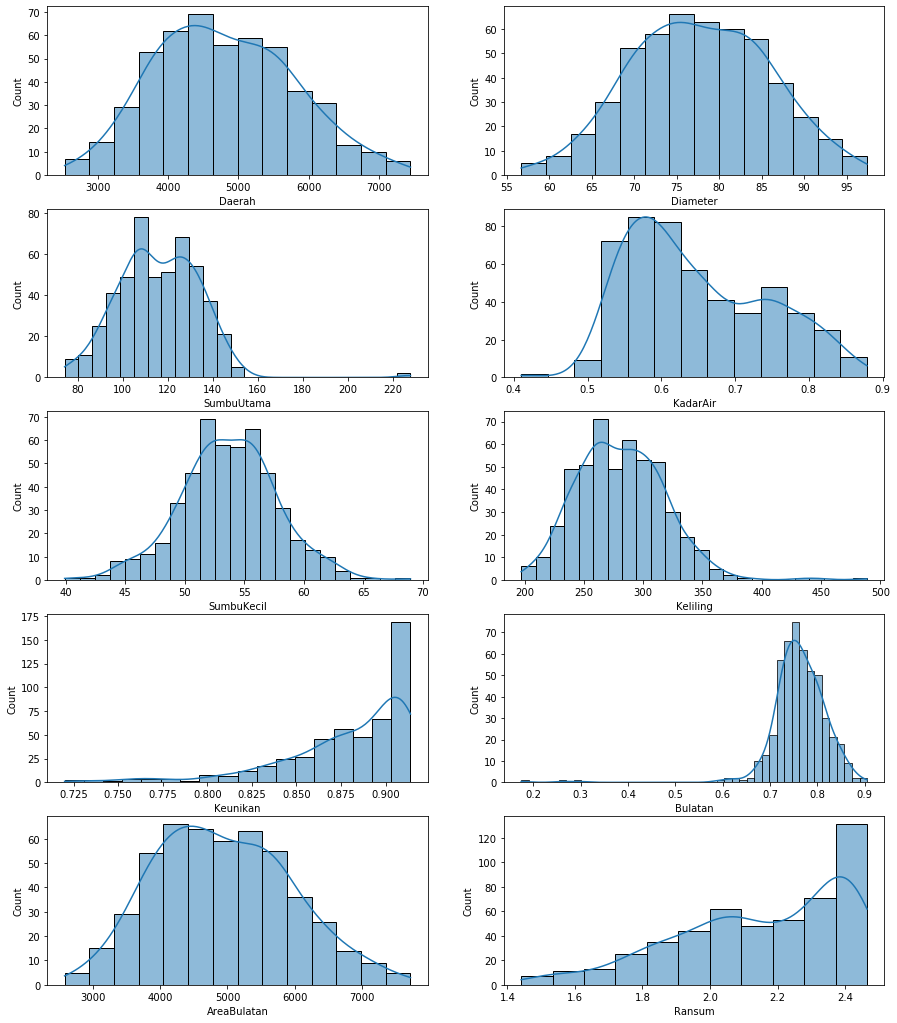

In [4]:
fig, axs = plt.subplots(5, 2, figsize=(15, 18))
sns.histplot(gandum["Daerah"], kde=True, ax=axs[0,0])
sns.histplot(gandum["SumbuUtama"], kde=True, ax=axs[1,0])
sns.histplot(gandum["SumbuKecil"], kde=True, ax=axs[2,0])
sns.histplot(gandum["Keunikan"], kde=True, ax=axs[3,0])
sns.histplot(gandum["AreaBulatan"], kde=True, ax=axs[4,0])
sns.histplot(gandum["Diameter"], kde=True, ax=axs[0,1])
sns.histplot(gandum["KadarAir"], kde=True, ax=axs[1,1])
sns.histplot(gandum["Keliling"], kde=True, ax=axs[2,1])
sns.histplot(gandum["Bulatan"], kde=True, ax=axs[3,1])
sns.histplot(gandum["Ransum"], kde=True, ax=axs[4,1])
plt.show()

<b>Daerah</b>
<br>
Histogram menunjukkan diagram yang hampir normal meskipun sedikit skew positif. Karena itu, boxplot juga terlihat hampir simetris

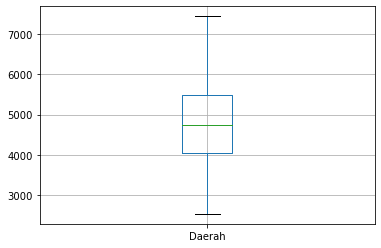

In [5]:
gandum.boxplot("Daerah")

<b>SumbuUtama</b>
<br>
Histogram menunjukkan bahwa ada sebuah outlier pada nilaidi atas 220, maka dari itu juga ditunjukkan sebagai lingkaran dalam boxplot. meskipun terdapat 2 buah nilai ekstrim di histogram, boxplot masih terlihat simetris

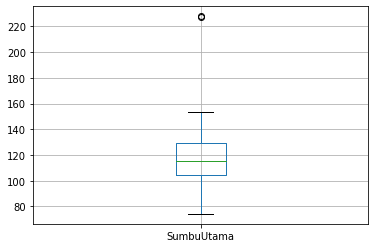

In [6]:
gandum.boxplot("SumbuUtama")

<b>SumbuKecil</b>
<br>
Meskipun terdapat beberapa outlier, histogram dan boxplot menunjukkan hasil yang hampir simetris

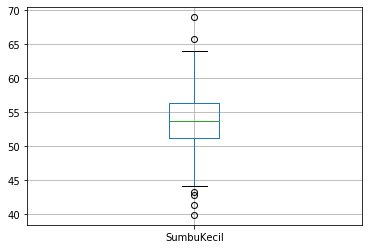

In [7]:
gandum.boxplot("SumbuKecil")

<b>Keunikan</b>
<br>
Jika dilihat dari histogram, nilai sangat condong ke kanan atau negatively skewed. Maka dari itu boxplot tertarik ke bagian atas dan nilai-nilai yang bawah banyak yang menjadi outlier

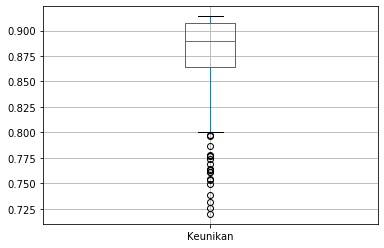

In [8]:
gandum.boxplot("Keunikan")

<b>AreaBulatan</b>
<br>
Histogram menunjukkan diagram yang hampir normal meskipun sedikit skew positif. Karena itu, boxplot juga terlihat hampir simetris

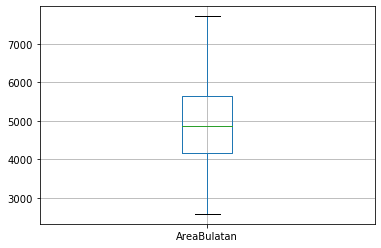

In [9]:
gandum.boxplot("AreaBulatan")

<b>Diameter</b>
<br>
Kedua histogram dan boxplot menunjukkan hasil yang hampir simetris

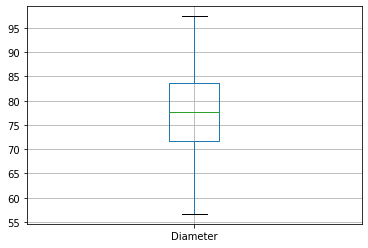

In [10]:
gandum.boxplot("Diameter")

<b>KadarAir</b>
<br>
Distribusi kadar air memiliki skew yang tinggi, sehingga pada boxplot garis mean tidak berada di tengah

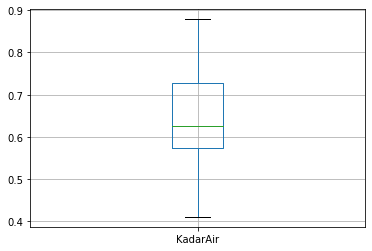

In [11]:
gandum.boxplot("KadarAir")

<b>Keliling</b>
<br>
Histogram dan boxplot menunjukkan distribusi yang hampir simetris,meskipun terdapat beberapa outlier yang berakibat pada boxplot tidak berada di tengah tengah

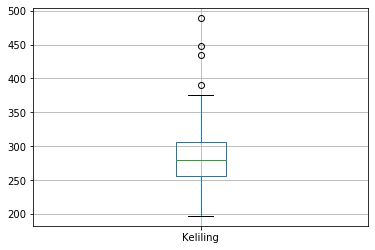

In [12]:
gandum.boxplot("Keliling")

<b>Bulatan</b>
<br>
Terdapat beberapa outlier pada distribusi bulatan, beberapa bahkan memiliki nilai yang sangat jauh. Distribusi bulatan hampir simetris, maka dari itu boxplot juga terlihat simetris (tidak termasuk outlier)

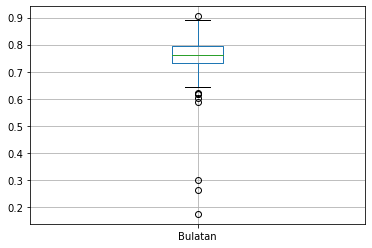

In [13]:
gandum.boxplot("Bulatan")

<b>Ransum</b>
<br>
Nilai ransum sangat negatively skewed, maka dari itu boxplot terlihat seakan akan tertarik ke atas.

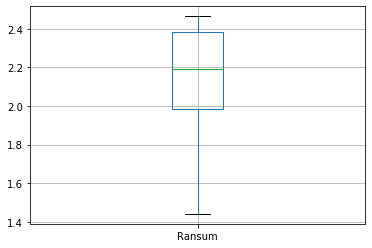

In [14]:
gandum.boxplot("Ransum")

### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak
Dilakukan graphical normality test berdasarkan histogram yang telah digambarkan pada nomor 2:

**Daerah** tidak berdistribusi normal

**SumbuUtama** tidak berdistribusi normal

**SumbuKecil** berdistribusi normal

**Keunikan** tidak berdistribusi normal

**AreaBulatan** tidak berdistribusi normal

**Diameter** berdistribusi normal

**KadarAir** tidak berdistribusi normal

**Keliling** tidak berdistribusi normal

**Bulatan** berdistribusi normal

**Ransum** tidak berdistribusi normal


### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing
   menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.<br>
   Diambil sampel sebesar 218 dari 500<br>

In [15]:
#diambil sampel gandum sebesar 218
splSize = 218
sampleGandum = gandum.sample(splSize)

#fungsi untuk menghitung z score
def zScore(spMean, popMean, popStd, nSample):
    return ((spMean-popMean)*(nSample)**(1/2))/popStd

Mean sampel =  4858.481651376147
Z score yang didapat :  2.3722265167166485
P value nya adalah :  0.008840623602323582


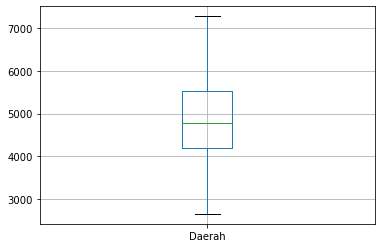

In [16]:
# 4a. Nilai rata-rata Daerah di atas 4700?
# 1) null hypothesis : mean = 4700
# 2) alternative hypothesis : mean > 4700
# 3) alpha : 0.05
# 4) uji tes mean Z one tailed, digunakan alpha = 0.05, daerah kritis: Z > 1.645
# 5) uji tes statistik one tailed : 
splMean = sampleGandum["Daerah"].mean()
print("Mean sampel = ", splMean)
zscr = zScore(splMean, 4700, gandum["Daerah"].std(),218)
print("Z score yang didapat : ", zscr)
print("P value nya adalah : ", scipy.stats.norm.sf(abs(zscr))) #onesided
# 6)nilai Z berada pada daerah kritis dan p-value lebih kecil dari alpha, maka tolak null hypothesis

#boxplot
sampleGandum.boxplot("Daerah")

Mean sampel =  117.41747550605504
Z score yang didapat :  1.1447357227403112
P value nya adalah :  0.25231864879865706


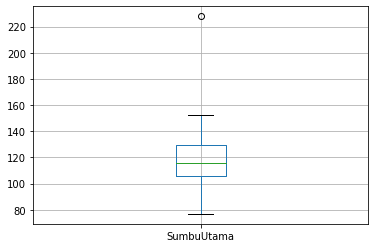

In [17]:
# 4b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
# 1) null hypothesis : mean = 116
# 2) alternative hypothesis : mean ≠ 116
# 3) alpha : 0.05
# 4) uji tes mean Z two tailed, digunakan alpha = 0.05 dan statistik two tailed
# 	maka daerah kritis: Z < -1.96 dan 1.96 < Z
# 5) uji nilai statistik two tailed :
splMean = sampleGandum["SumbuUtama"].mean()
print("Mean sampel = ", splMean)
zscr = zScore(splMean, 116, gandum["SumbuUtama"].std(),218)
print("Z score yang didapat : ", zscr)
print("P value nya adalah : ", scipy.stats.norm.sf(abs(zscr))*2)
# 6) nilai Z tidak berada pada daerah kritis dan p-value lebih besar dari alpha, maka gagal untuk menolak null hypothesis.

#BOXPLOT BELUM
sampleGandum.boxplot("SumbuUtama")

Mean 20 pertama :  54.8872762605
Z score yang didapat :  5.368745408889905
P value nya adalah :  7.928624964898141e-08 (mendekati 0)

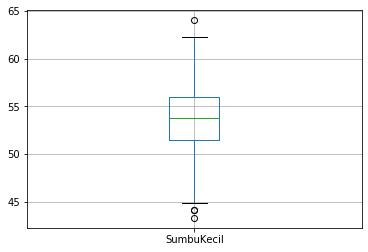

In [18]:
# 4c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
# diketahui dari data 20 pertama:
# mean = 54.887
# std = 3.373

# 1) null hypothesis : mean = 50
# 2) alternative hypothesis : mean ≠ 50
# 3) alpha = 0.05
# 4) uji tes mean Z two tailed, digunakan alpha = 0.05 dan statistik two tailed
# 	maka daerah kritis: Z < -1.96 dan 1.96 < Z
# 5) uji nilai statistik two tailed:
meanFirstTwnty = gandum["SumbuKecil"].loc[:19].mean()
print("Mean 20 pertama : ",meanFirstTwnty)
zscr = zScore(meanFirstTwnty, 50, gandum["SumbuKecil"].std(),20)
print("Z score yang didapat : ", zscr)
print("P value nya adalah : ", scipy.stats.norm.sf(abs(zscr))*2, end=' (mendekati 0)')
# 6) nilai Z berada pada daerah kritis, maka null hypothesis ditolak

sampleGandum.boxplot("SumbuKecil")

Jumlah diameter gandum yang lebih dari 85 :  43
Z score yang didapat :  1.9536820463950093
P value nya adalah :  0.05073883082905496


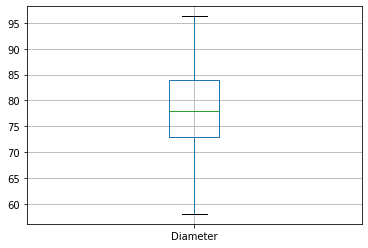

In [19]:
# 4d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
# 1) null hypothesis : P = 0.15
# 2) alternative hypothesis : P ≠ 0.15
# 3) alpha = 0.05
# 4) digunakan alpha = 0.05 dan statistik two tailed
# 	maka daerah kritis: Z < -1.96 dan 1.96 < Z
# 5) uji nilai statistik two tailed:
#   P(Diameter > 85) = 97/500 = 0.194
# 	Z = 0.194-0.15/(√0.15*0.85/500) = 2.755
# 	p = 2(P<-2.755) = 0.00587
amtConstraint = len(sampleGandum["Diameter"].loc[sampleGandum["Diameter"] > 85])
print("Jumlah diameter gandum yang lebih dari 85 : ", amtConstraint)
zscr = ((amtConstraint/splSize)-0.15)/(0.15*0.85/splSize)**(1/2)
print("Z score yang didapat : ", zscr)
print("P value nya adalah : ", scipy.stats.norm.sf(abs(zscr))*2) 
# 6) nilai Z tak berada pada daerah kritis, maka null hypothesis gagal ditolak

sampleGandum.boxplot("Diameter")

Jumlah keliling gandum yang kurang dari 100 :  0
Z score yang didapat :  -6.202466302632697
P value nya adalah :  2.779254463865401e-10


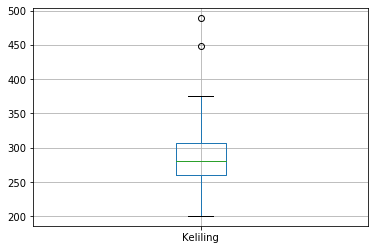

In [20]:
# 4e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?
# 1) null hypothesis : P = 0.05
# 2) alternative hypothesis : P < 0.05
# 3) alpha = 0.05
# 4) digunakan alpha = 0.05 dan statistik one tailed
# 	maka daerah kritis: Z < -1.645
# 5) uji nilai statistik one tailed:
#   P(Keliling < 100) = 0/500 = 0
# 	Z = 0-0.05/(√0.05*0.95/500) = -5.130
# 	p = 0 (mendekati)
amtConstraint = len(sampleGandum["Keliling"].loc[sampleGandum["Keliling"] < 100])
print("Jumlah keliling gandum yang kurang dari 100 : ", amtConstraint)
zscr = ((amtConstraint/splSize)-0.15)/(0.15*0.85/splSize)**(1/2)
print("Z score yang didapat : ", zscr)
print("P value nya adalah : ", scipy.stats.norm.sf(abs(zscr)))
# 6) nilai Z berada pada daerah kritis, maka null hypothesis ditolak

sampleGandum.boxplot("Keliling")

### 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing 
menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
<ul>
    <li>Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?</li>
    <li>Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?</li>
    <li>Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?</li>
    <li>Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?</li>
    <li>Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?</li>
</ul>

In [21]:
printMd("**Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?**")
AreaBulatanAwal = gandum.iloc[:gandum['AreaBulatan'].count()//2,:]
AreaBulatanAkhir = gandum.iloc[gandum['AreaBulatan'].count()//2:,:]
printMd("#### 1. Hipotesis nol")
printMd("$H_0 : \\mu_{AreaBulatanAwal} = \\mu_{AreaBulatanAkhir}$")
printMd("#### 2. Hipotesis alternatif")
printMd("$H_0 : \\mu_{AreaBulatanAwal} \\neq \\mu_{AreaBulatanAkhir}$ (two-tailed test)")
printMd("#### 3. Tingkat signifikan $\\alpha $")
printMd("$\\alpha$ = 0.05")
printMd("#### 4. Uji statistik dan daerah kritis")
printMd("Pada uji kali ini diasumsikan kolom AreaBulatan berdistribusi normal. Dan akan digunakan uji test $t$")
printMd("Derajat kebebasan = $n_{AreaBulatanAwal} + n_{AreaBulatanAkhir} - 2 = 498$")
printMd("Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $t' < -1.964$ atau $t' > 1.964$")
printMd("#### 5. Perhitungan nilai uji statistik dan $p-value$")
printMd("**Diketahui**")
printMd("$\\bar{X}_{AreaBulatanAwal} = "+ str(AreaBulatanAwal['AreaBulatan'].mean()) +  "$")
printMd("$\\bar{X}_{AreaBulatanAkhir} = " + str(AreaBulatanAkhir['AreaBulatan'].mean()) +"$")
printMd("$S^2_{AreaBulatanAwal} = "+ str(AreaBulatanAwal['AreaBulatan'].var()) +  "$")
printMd("$S^2_{AreaBulatanAkhir} = " + str(AreaBulatanAkhir['AreaBulatan'].var()) +"$")
printMd("$n_{AreaBulatanAwal} = 250,\\, n_{AreaBulatanAkhir} = 250$")
printMd("$t' = \\Large\\frac{(\\bar{X}_{AreaBulatanAwal} - \\bar{X}_{AreaBulatanAkhir})-d_0}{\\sqrt{\\Large\\frac{S^2_{AreaBulatanAwal}}{\\Large n_{AreaBulatanAwal}} + \\Large\\frac{S^2_{AreaBulatanAkhir}}{\\Large n_{AreaBulatanAkhir}}}}$")
printMd("dengan $d_0 = \\mu_{AreaBulatanAwal} - \\mu_{AreaBulatanAkhir} = 0$")
printMd("didapat **t' = "+str(((5549.804 - 4324.292) - 0)/((751733.1060080321/250) + (545480.424433735 /250))**0.5)+"**")
printMd("#### 6. Kesimpulan")
printMd("Nilai $t'$ yang didapat **terletak** di daerah kritis, $t' > 1.964$. Sehingga **$H_0$ ditolak**")

**Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?**

#### 1. Hipotesis nol

$H_0 : \mu_{AreaBulatanAwal} = \mu_{AreaBulatanAkhir}$

#### 2. Hipotesis alternatif

$H_0 : \mu_{AreaBulatanAwal} \neq \mu_{AreaBulatanAkhir}$ (two-tailed test)

#### 3. Tingkat signifikan $\alpha $

$\alpha$ = 0.05

#### 4. Uji statistik dan daerah kritis

Pada uji kali ini diasumsikan kolom AreaBulatan berdistribusi normal. Dan akan digunakan uji test $t$

Derajat kebebasan = $n_{AreaBulatanAwal} + n_{AreaBulatanAkhir} - 2 = 498$

Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $t' < -1.964$ atau $t' > 1.964$

#### 5. Perhitungan nilai uji statistik dan $p-value$

**Diketahui**

$\bar{X}_{AreaBulatanAwal} = 5549.804$

$\bar{X}_{AreaBulatanAkhir} = 4324.292$

$S^2_{AreaBulatanAwal} = 751733.1060080321$

$S^2_{AreaBulatanAkhir} = 545480.424433735$

$n_{AreaBulatanAwal} = 250,\, n_{AreaBulatanAkhir} = 250$

$t' = \Large\frac{(\bar{X}_{AreaBulatanAwal} - \bar{X}_{AreaBulatanAkhir})-d_0}{\sqrt{\Large\frac{S^2_{AreaBulatanAwal}}{\Large n_{AreaBulatanAwal}} + \Large\frac{S^2_{AreaBulatanAkhir}}{\Large n_{AreaBulatanAkhir}}}}$

dengan $d_0 = \mu_{AreaBulatanAwal} - \mu_{AreaBulatanAkhir} = 0$

didapat **t' = 17.013036648485464**

#### 6. Kesimpulan

Nilai $t'$ yang didapat **terletak** di daerah kritis, $t' > 1.964$. Sehingga **$H_0$ ditolak**

**Boxplot kolom AreaBulatan bagian awal**

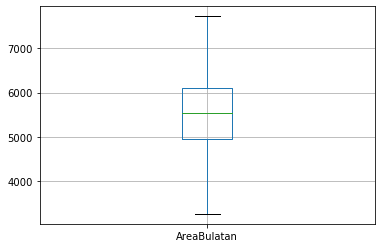

In [22]:
printMd("**Boxplot kolom AreaBulatan bagian awal**")
AreaBulatanAwal.boxplot(["AreaBulatan"])

**Boxplot kolom AreaBulatan bagian akhir**

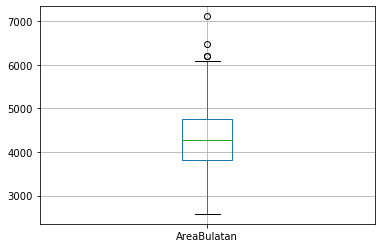

In [23]:
printMd("**Boxplot kolom AreaBulatan bagian akhir**")
AreaBulatanAkhir.boxplot(["AreaBulatan"])

In [24]:
printMd("**Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?**")
KadarAirAwal = gandum.iloc[:gandum['KadarAir'].count()//2,:]
KadarAirAkhir = gandum.iloc[gandum['KadarAir'].count()//2:,:]
printMd("#### 1. Hipotesis nol")
printMd("$H_0 : \\mu_{KadarAirAwal} = \\mu_{KadarAirAkhir} + 0.2$")
printMd("#### 2. Hipotesis alternatif")
printMd("$H_0 : \\mu_{KadarAirAwal} \\neq \\mu_{KadarAirAkhir} + 0.2$ (two-tailed test)")
printMd("#### 3. Tingkat signifikan $\\alpha $")
printMd("$\\alpha$ = 0.05")
printMd("#### 4. Uji statistik dan daerah kritis")
printMd("Pada uji kali ini diasumsikan kolom KadarAir berdistribusi normal. Dan akan digunakan uji test $t$")
printMd("Derajat kebebasan = $n_{KadarAirAwal} + n_{KadarAirAkhir} - 2 = 498$")
printMd("Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $t' < -1.964$ atau $t' > 1.964$")
printMd("#### 5. Perhitungan nilai uji statistik dan $p-value$")
printMd("**Diketahui**")
printMd("$\\bar{X}_{KadarAirAwal} = "+ str(KadarAirAwal['KadarAir'].mean()) +  "$")
printMd("$\\bar{X}_{KadarAirAkhir} = " + str(KadarAirAkhir['KadarAir'].mean()) +"$")
printMd("$S^2_{KadarAirAwal} = "+ str(KadarAirAwal['KadarAir'].var()) +  "$")
printMd("$S^2_{KadarAirAkhir} = " + str(KadarAirAkhir['KadarAir'].var()) +"$")
printMd("$n_{KadarAirAwal} = 250,\\, n_{KadarAirAkhir} = 250$")
printMd("$t' = \\Large\\frac{(\\bar{X}_{KadarAirAwal} - \\bar{X}_{KadarAirAkhir})-d_0}{\\sqrt{\\Large\\frac{S^2_{KadarAirAwal}}{\\Large n_{KadarAirAwal}} + \\Large\\frac{S^2_{KadarAirAkhir}}{\\Large n_{KadarAirAkhir}}}}$")
printMd("dengan $d_0 = \\mu_{KadarAirAwal} - \\mu_{KadarAirAkhir} = 0$")
printMd("didapat **t' = "+str(((0.63574344072 - 0.660999903076) - 0)/((0.009043200047076564/250) + (0.008482636662870604 /250))**0.5)+"**")
printMd("#### 6. Kesimpulan")
printMd("Nilai $t'$ yang didapat **terletak** di daerah kritis, $t' < -1.964$. Sehingga **$H_0$ ditolak**")

**Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?**

#### 1. Hipotesis nol

$H_0 : \mu_{KadarAirAwal} = \mu_{KadarAirAkhir} + 0.2$

#### 2. Hipotesis alternatif

$H_0 : \mu_{KadarAirAwal} \neq \mu_{KadarAirAkhir} + 0.2$ (two-tailed test)

#### 3. Tingkat signifikan $\alpha $

$\alpha$ = 0.05

#### 4. Uji statistik dan daerah kritis

Pada uji kali ini diasumsikan kolom KadarAir berdistribusi normal. Dan akan digunakan uji test $t$

Derajat kebebasan = $n_{KadarAirAwal} + n_{KadarAirAkhir} - 2 = 498$

Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $t' < -1.964$ atau $t' > 1.964$

#### 5. Perhitungan nilai uji statistik dan $p-value$

**Diketahui**

$\bar{X}_{KadarAirAwal} = 0.63574344072$

$\bar{X}_{KadarAirAkhir} = 0.660999903076$

$S^2_{KadarAirAwal} = 0.009043200047076564$

$S^2_{KadarAirAkhir} = 0.008482636662870604$

$n_{KadarAirAwal} = 250,\, n_{KadarAirAkhir} = 250$

$t' = \Large\frac{(\bar{X}_{KadarAirAwal} - \bar{X}_{KadarAirAkhir})-d_0}{\sqrt{\Large\frac{S^2_{KadarAirAwal}}{\Large n_{KadarAirAwal}} + \Large\frac{S^2_{KadarAirAkhir}}{\Large n_{KadarAirAkhir}}}}$

dengan $d_0 = \mu_{KadarAirAwal} - \mu_{KadarAirAkhir} = 0$

didapat **t' = -3.0164987047810152**

#### 6. Kesimpulan

Nilai $t'$ yang didapat **terletak** di daerah kritis, $t' < -1.964$. Sehingga **$H_0$ ditolak**

**Boxplot kolom KadarAir bagian awal**

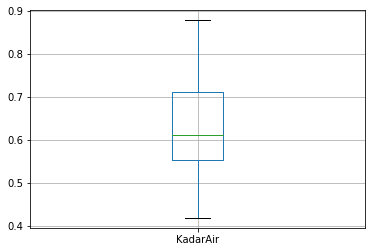

In [25]:
printMd("**Boxplot kolom KadarAir bagian awal**")
KadarAirAwal.boxplot(["KadarAir"])

**Boxplot kolom KadarAir bagian akhir**

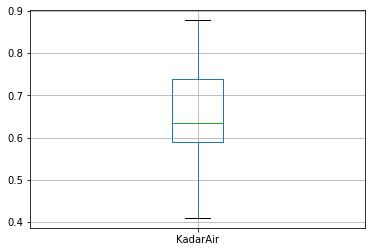

In [26]:
printMd("**Boxplot kolom KadarAir bagian akhir**")
KadarAirAkhir.boxplot(["KadarAir"])

In [27]:
printMd("**Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?**")
BulatanAwal = gandum.iloc[:20,:]
BulatanAkhir = gandum.iloc[-20:,:]
printMd("#### 1. Hipotesis nol")
printMd("$H_0 : \\mu_{BulatanAwal} = \\mu_{BulatanAkhir}$")
printMd("#### 2. Hipotesis alternatif")
printMd("$H_0 : \\mu_{BulatanAwal} \\neq \\mu_{BulatanAkhir}$ (two-tailed test)")
printMd("#### 3. Tingkat signifikan $\\alpha $")
printMd("$\\alpha$ = 0.05")
printMd("#### 4. Uji statistik dan daerah kritis")
printMd("Pada uji kali ini diasumsikan kolom Bulatan berdistribusi normal. Dan akan digunakan uji test $t$")
printMd("Derajat kebebasan = $n_{BulatanAwal} + n_{BulatanAkhir} - 2 = 38$")
printMd("Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $t' < -2.024394$ atau $t' > 2.024394$")
printMd("#### 5. Perhitungan nilai uji statistik dan $p-value$")
printMd("**Diketahui**")
printMd("$\\bar{X}_{BulatanAwal} = "+ str(BulatanAwal['Bulatan'].mean()) +  "$")
printMd("$\\bar{X}_{BulatanAkhir} = " + str(BulatanAkhir['Bulatan'].mean()) +"$")
printMd("$S^2_{BulatanAwal} = "+ str(BulatanAwal['Bulatan'].var()) +  "$")
printMd("$S^2_{BulatanAkhir} = " + str(BulatanAkhir['Bulatan'].var()) +"$")
printMd("$n_{BulatanAwal} = 20,\\, n_{BulatanAkhir} = 20$")
printMd("$t' = \\Large\\frac{(\\bar{X}_{BulatanAwal} - \\bar{X}_{BulatanAkhir})-d_0}{\\sqrt{\\Large\\frac{S^2_{BulatanAwal}}{\\Large n_{BulatanAwal}} + \\Large\\frac{S^2_{BulatanAkhir}}{\\Large n_{BulatanAkhir}}}}$")
printMd("dengan $d_0 = \\mu_{BulatanAwal} - \\mu_{BulatanAkhir} = 0$")
printMd("didapat **t' = "+str(((0.7375353552500001 - 0.7673224369999999) - 0)/((0.0009232346025806985/20) + (0.0006307661055759373 /20))**0.5)+"**")
printMd("#### 6. Kesimpulan")
printMd("Nilai $t'$ yang didapat **terletak** di daerah kritis, $t' < -2.024394$. Sehingga **$H_0$ ditolak**")

**Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?**

#### 1. Hipotesis nol

$H_0 : \mu_{BulatanAwal} = \mu_{BulatanAkhir}$

#### 2. Hipotesis alternatif

$H_0 : \mu_{BulatanAwal} \neq \mu_{BulatanAkhir}$ (two-tailed test)

#### 3. Tingkat signifikan $\alpha $

$\alpha$ = 0.05

#### 4. Uji statistik dan daerah kritis

Pada uji kali ini diasumsikan kolom Bulatan berdistribusi normal. Dan akan digunakan uji test $t$

Derajat kebebasan = $n_{BulatanAwal} + n_{BulatanAkhir} - 2 = 38$

Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $t' < -2.024394$ atau $t' > 2.024394$

#### 5. Perhitungan nilai uji statistik dan $p-value$

**Diketahui**

$\bar{X}_{BulatanAwal} = 0.7375353552500001$

$\bar{X}_{BulatanAkhir} = 0.7673224369999999$

$S^2_{BulatanAwal} = 0.0009232346025806985$

$S^2_{BulatanAkhir} = 0.0006307661055759373$

$n_{BulatanAwal} = 20,\, n_{BulatanAkhir} = 20$

$t' = \Large\frac{(\bar{X}_{BulatanAwal} - \bar{X}_{BulatanAkhir})-d_0}{\sqrt{\Large\frac{S^2_{BulatanAwal}}{\Large n_{BulatanAwal}} + \Large\frac{S^2_{BulatanAkhir}}{\Large n_{BulatanAkhir}}}}$

dengan $d_0 = \mu_{BulatanAwal} - \mu_{BulatanAkhir} = 0$

didapat **t' = -3.3792268633123648**

#### 6. Kesimpulan

Nilai $t'$ yang didapat **terletak** di daerah kritis, $t' < -2.024394$. Sehingga **$H_0$ ditolak**

**Boxplot kolom Bulatan bagian awal**

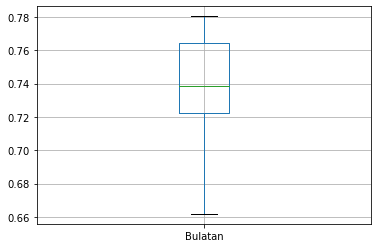

In [28]:
printMd("**Boxplot kolom Bulatan bagian awal**")
BulatanAwal.boxplot(["Bulatan"])

**Boxplot kolom Bulatan bagian akhir**

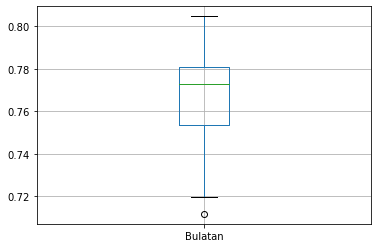

In [29]:
printMd("**Boxplot kolom Bulatan bagian akhir**")
BulatanAkhir.boxplot(["Bulatan"])

In [30]:
printMd("**Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?**")
RansumAwal = gandum.iloc[:gandum['Ransum'].count()//2,:]
RansumAkhir = gandum.iloc[gandum['Ransum'].count()//2:,:]
printMd("#### 1. Hipotesis nol")
printMd("$H_0 : P(X_1 > 2) = P(X_2 > 2)$")
printMd("#### 2. Hipotesis alternatif")
printMd("$H_0 : P(X_1 > 2) > P(X_2 > 2)$(one-tailed test)")
printMd("#### 3. Tingkat signifikan $\\alpha $")
printMd("$\\alpha$ = 0.05")
printMd("#### 4. Uji statistik dan daerah kritis")
printMd("Pada uji kali ini diasumsikan kolom Bulatan berdistribusi normal. Dan akan digunakan uji test $Normal \\space Z$")
printMd("Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $z > z_{0.05}=1.645$")
printMd("#### 5. Perhitungan nilai uji statistik dan $p-value$")
printMd("**Diketahui**")
printMd("$\\hat{p}_1 = \\Large\\frac{x_1}{n_1} $ ")
printMd("$\\hat{p}_2 = \\Large\\frac{x_2}{n_2} $ ")
printMd("$\\bar{p} = \\Large\\frac{x_1 + x_2}{n_1 + n_2} $ ")
printMd("$z = \\Large\\frac{\\hat{p}_1 - \\hat{p}_2}{\\sqrt{\\bar{p}(1-\\bar{p})(\\frac{1}{n_1} + \\frac{1}{n_2})}}$")
jumlahLebihDari2Awal = 0
jumlahLebihDari2Akhir = 0
for i in range(500):
    if(i < 250):
        if (RansumAwal["Ransum"][i] > 2):
            jumlahLebihDari2Awal += 1
    else:
        if (RansumAkhir["Ransum"][i] > 2):
            jumlahLebihDari2Akhir += 1

printMd("$\\hat{p}_1 = " + f"{jumlahLebihDari2Awal/250}$")
printMd("$\\hat{p}_2 = " + f"{jumlahLebihDari2Akhir/250}$")
printMd("$\\bar{p} = " + f"{(jumlahLebihDari2Awal + jumlahLebihDari2Akhir)/500}$")
printMd("$n_1 = 250,\\, n_2 = 250$")
printMd("didapat **z = "+str((0.996-0.464)/(0.73*(1-0.73)*((1/250)+(1/250)))**0.5)+"**")
printMd("#### 6. Kesimpulan")
printMd("Nilai $z$ yang didapat **terletak** di daerah kritis, $z > z_{0.05}=1.645$. Sehingga **$H_0$ ditolak**")

**Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?**

#### 1. Hipotesis nol

$H_0 : P(X_1 > 2) = P(X_2 > 2)$

#### 2. Hipotesis alternatif

$H_0 : P(X_1 > 2) > P(X_2 > 2)$(one-tailed test)

#### 3. Tingkat signifikan $\alpha $

$\alpha$ = 0.05

#### 4. Uji statistik dan daerah kritis

Pada uji kali ini diasumsikan kolom Bulatan berdistribusi normal. Dan akan digunakan uji test $Normal \space Z$

Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $z > z_{0.05}=1.645$

#### 5. Perhitungan nilai uji statistik dan $p-value$

**Diketahui**

$\hat{p}_1 = \Large\frac{x_1}{n_1} $ 

$\hat{p}_2 = \Large\frac{x_2}{n_2} $ 

$\bar{p} = \Large\frac{x_1 + x_2}{n_1 + n_2} $ 

$z = \Large\frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\bar{p}(1-\bar{p})(\frac{1}{n_1} + \frac{1}{n_2})}}$

$\hat{p}_1 = 0.996$

$\hat{p}_2 = 0.464$

$\bar{p} = 0.73$

$n_1 = 250,\, n_2 = 250$

didapat **z = 13.397486455610238**

#### 6. Kesimpulan

Nilai $z$ yang didapat **terletak** di daerah kritis, $z > z_{0.05}=1.645$. Sehingga **$H_0$ ditolak**

**Boxplot kolom Ransum bagian akhir**

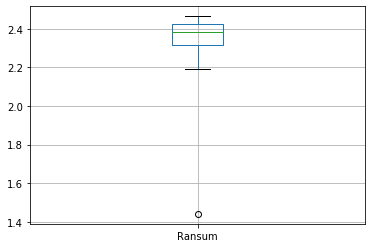

In [31]:
printMd("**Boxplot kolom Ransum bagian akhir**")
RansumAwal.boxplot(["Ransum"])

**Boxplot kolom Ransum bagian akhir**

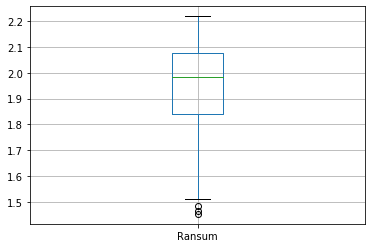

In [32]:
printMd("**Boxplot kolom Ransum bagian akhir**")
RansumAkhir.boxplot(["Ransum"])

In [33]:
printMd("**Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?**")
DiameterAwal = gandum.iloc[:gandum['Diameter'].count()//2,:]
DiameterAkhir = gandum.iloc[gandum['Diameter'].count()//2:,:]
printMd("#### 1. Hipotesis nol")
printMd("$\\sigma^2_{DiameterAwal} = \\sigma^2_{DiameterAkhir}$")
printMd("#### 2. Hipotesis alternatif")
printMd("$\\sigma^2_{DiameterAwal} \\neq \\sigma^2_{DiameterAkhir}$ (two-tailed test)")
printMd("#### 3. Tingkat signifikan $\\alpha $")
printMd("$\\alpha$ = 0.05")
printMd("#### 4. Uji statistik dan daerah kritis")
printMd("Pada uji kali ini diasumsikan kolom Bulatan berdistribusi normal. Dan akan digunakan uji test $distribusi F$")
printMd("Derajat kebebasan v1= $n_{DiameterAwal} - 1 = 249$")
printMd("Derajat kebebasan v2= $n_{DiameterAkhir} - 1 = 249$")
printMd("Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $ 0 < f \\le 0.7796$ atau $f \\ge 1.2827$")
printMd("#### 5. Perhitungan nilai uji statistik dan $p-value$")
printMd("**Diketahui**")
printMd("$s^2_{DiameterAwal} = "+ str(DiameterAwal['Diameter'].var()) +  "$")
printMd("$s^2_{DiameterAkhir} = " + str(DiameterAkhir['Diameter'].var()) +"$")
printMd("$n_{DiameterAwal} = 250,\\, n_{DiameterAkhir} = 250$")
printMd("$f = \\Large\\frac{s^2_{DiameterAwal}}{s^2_{DiameterAkhir}}$")
printMd("didapat **f = "+str(43.168980426322435/39.8282643880772)+"**")
printMd("#### 6. Kesimpulan")
printMd("Nilai $f$ yang didapat **tidak terletak** di daerah kritis, $0.7796 < f < 1.2827$. Sehingga **$H_0$ diterima**")

**Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?**

#### 1. Hipotesis nol

$\sigma^2_{DiameterAwal} = \sigma^2_{DiameterAkhir}$

#### 2. Hipotesis alternatif

$\sigma^2_{DiameterAwal} \neq \sigma^2_{DiameterAkhir}$ (two-tailed test)

#### 3. Tingkat signifikan $\alpha $

$\alpha$ = 0.05

#### 4. Uji statistik dan daerah kritis

Pada uji kali ini diasumsikan kolom Bulatan berdistribusi normal. Dan akan digunakan uji test $distribusi F$

Derajat kebebasan v1= $n_{DiameterAwal} - 1 = 249$

Derajat kebebasan v2= $n_{DiameterAkhir} - 1 = 249$

Dengan derajat kebebasan tersebut dapat ditentukan nilai kritis menggunakan kalkulator dan didapat $ 0 < f \le 0.7796$ atau $f \ge 1.2827$

#### 5. Perhitungan nilai uji statistik dan $p-value$

**Diketahui**

$s^2_{DiameterAwal} = 43.168980426322435$

$s^2_{DiameterAkhir} = 39.8282643880772$

$n_{DiameterAwal} = 250,\, n_{DiameterAkhir} = 250$

$f = \Large\frac{s^2_{DiameterAwal}}{s^2_{DiameterAkhir}}$

didapat **f = 1.083878022042188**

#### 6. Kesimpulan

Nilai $f$ yang didapat **tidak terletak** di daerah kritis, $0.7796 < f < 1.2827$. Sehingga **$H_0$ diterima**

**Boxplot kolom Diameter bagian awal**

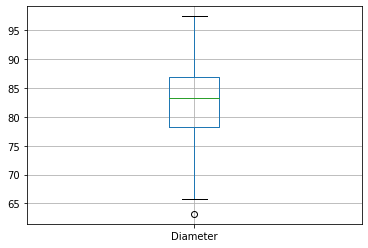

In [34]:
printMd("**Boxplot kolom Diameter bagian awal**")
DiameterAwal.boxplot(["Diameter"])

**Boxplot kolom Diameter bagian akhir**

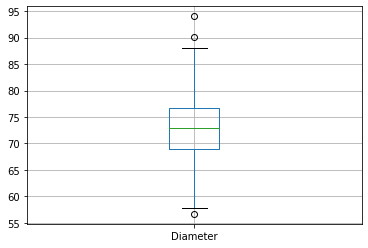

In [35]:
printMd("**Boxplot kolom Diameter bagian akhir**")
DiameterAkhir.boxplot(["Diameter"])

### 6. Test korelasi
tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

#### KEKUATAN DAN ARAH HUBUNGAN
Kekuatan hubungan dapat dilihat dari koefisien korelasi. Koefisien korelasi berada pada rentang antara -1 dan 1:
- -1 menunjukkan korelasi $X$ dan $Y$ negatif yang kuat. setiap kali $X$ meningkat, $Y$ berkurang.
- 0 berarti tidak ada hubungan antara $X$ dan $Y$.
- 1 menunjukkan korelasi $X$ dan $Y$ positif yang kuat. setiap kali $X$ meningkat, $Y$ meningkat.
<br>


Untuk memudahkan melakukan interpretasi mengenai kekuatan hubungan antara dua variabel, Sarwono (2006) memberikan kriteria sebagai berikut:
- 0 : **Tidak ada korelasi** antara dua variabel
- 0 – 0,25: **Korelasi sangat lemah**
- 0,25 – 0,5: **Korelasi cukup**
- 0,5 – 0,75: **Korelasi  kuat**
- 0,75 – 0,99: **Korelasi  sangat kuat**
- 1: **Korelasi sempurna**

#### Daerah

Hasil korelasi kolom Daerah(non-target) dengan kolom Kelas(target)

$\rho_{Daerah,Kelas} = $-0.6027466517416693

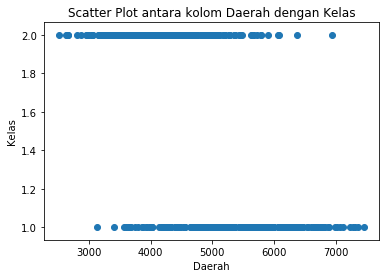

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Daerah dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.

In [36]:
printMd("#### Daerah")
printMd("Hasil korelasi kolom Daerah(non-target) dengan kolom Kelas(target)")
printMd("$\\rho_{Daerah,Kelas} = $"+str(gandum['Daerah'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom Daerah dengan Kelas")
plt.scatter(x=gandum['Daerah'],y=gandum['Kelas'])
plt.xlabel("Daerah")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Daerah dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.")

#### SumbuUtama

Hasil korelasi kolom SumbuUtama(non-target) dengan kolom Kelas(target

$\rho_{SumbuUtama,Kelas} = $-0.7130906104204634

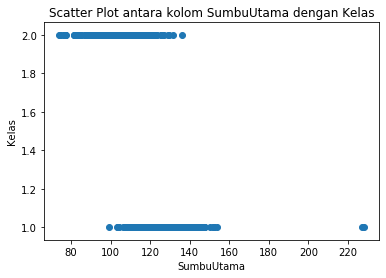

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom SumbuUtama dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.

In [37]:
printMd("#### SumbuUtama")
printMd("Hasil korelasi kolom SumbuUtama(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{SumbuUtama,Kelas} = $"+str(gandum['SumbuUtama'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom SumbuUtama dengan Kelas")
plt.scatter(x=gandum['SumbuUtama'],y=gandum['Kelas'])
plt.xlabel("SumbuUtama")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom SumbuUtama dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.")

#### SumbuKecil

Hasil korelasi kolom SumbuKecil(non-target) dengan kolom Kelas(target

$\rho_{SumbuKecil,Kelas} = $-0.15297517335535132

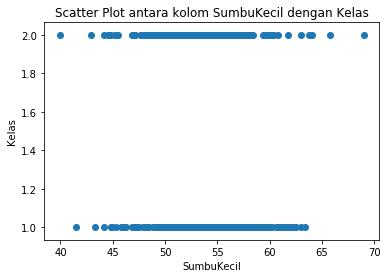

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom SumbuKecil dan Kelas berkorelasi **negatif** dan termasuk **Korelasi sangat lemah**.

In [38]:
printMd("#### SumbuKecil")
printMd("Hasil korelasi kolom SumbuKecil(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{SumbuKecil,Kelas} = $"+str(gandum['SumbuKecil'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom SumbuKecil dengan Kelas")
plt.scatter(x=gandum['SumbuKecil'],y=gandum['Kelas'])
plt.xlabel("SumbuKecil")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom SumbuKecil dan Kelas berkorelasi **negatif** dan termasuk **Korelasi sangat lemah**.")

#### Keunikan

Hasil korelasi kolom Keunikan(non-target) dengan kolom Kelas(target

$\rho_{Keunikan,Kelas} = $-0.7304563686511966

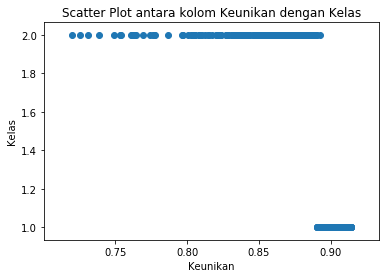

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Keunikan dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.

In [39]:
printMd("#### Keunikan")
printMd("Hasil korelasi kolom Keunikan(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{Keunikan,Kelas} = $"+str(gandum['Keunikan'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom Keunikan dengan Kelas")
plt.scatter(x=gandum['Keunikan'],y=gandum['Kelas'])
plt.xlabel("Keunikan")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Keunikan dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.")

#### AreaBulatan

Hasil korelasi kolom AreaBulatan(non-target) dengan kolom Kelas(target

$\rho_{AreaBulatan,Kelas} = $-0.6073125434153784

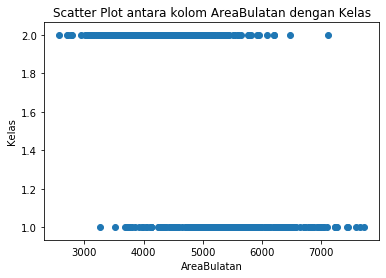

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom AreaBulatan dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.

In [40]:
printMd("#### AreaBulatan")
printMd("Hasil korelasi kolom AreaBulatan(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{AreaBulatan,Kelas} = $"+str(gandum['AreaBulatan'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom AreaBulatan dengan Kelas")
plt.scatter(x=gandum['AreaBulatan'],y=gandum['Kelas'])
plt.xlabel("AreaBulatan")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom AreaBulatan dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.")

#### Diameter

Hasil korelasi kolom Diameter(non-target) dengan kolom Kelas(target

$\rho_{Diameter,Kelas} = $-0.6025356896618852

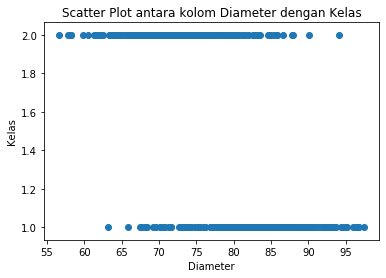

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Diameter dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.

In [41]:
printMd("#### Diameter")
printMd("Hasil korelasi kolom Diameter(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{Diameter,Kelas} = $"+str(gandum['Diameter'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom Diameter dengan Kelas")
plt.scatter(x=gandum['Diameter'],y=gandum['Kelas'])
plt.xlabel("Diameter")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Diameter dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.")

#### KadarAir

Hasil korelasi kolom KadarAir(non-target) dengan kolom Kelas(target

$\rho_{KadarAir,Kelas} = $0.13434422605727736

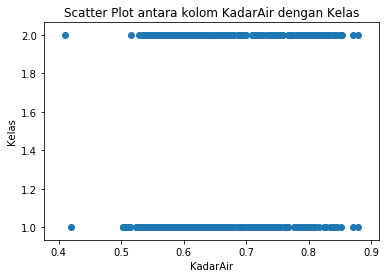

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom KadarAir dan Kelas berkorelasi **positif** dan termasuk **Korelasi sangat lemah**.

In [42]:
printMd("#### KadarAir")
printMd("Hasil korelasi kolom KadarAir(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{KadarAir,Kelas} = $"+str(gandum['KadarAir'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom KadarAir dengan Kelas")
plt.scatter(x=gandum['KadarAir'],y=gandum['Kelas'])
plt.xlabel("KadarAir")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom KadarAir dan Kelas berkorelasi **positif** dan termasuk **Korelasi sangat lemah**.")

#### Keliling

Hasil korelasi kolom Keliling(non-target) dengan kolom Kelas(target

$\rho_{Keliling,Kelas} = $-0.6348607454756899

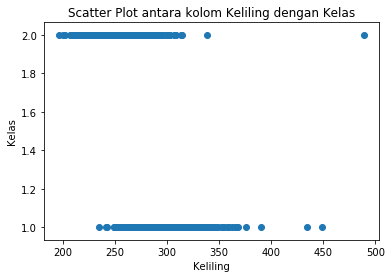

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Keliling dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.

In [43]:
printMd("#### Keliling")
printMd("Hasil korelasi kolom Keliling(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{Keliling,Kelas} = $"+str(gandum['Keliling'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom Keliling dengan Kelas")
plt.scatter(x=gandum['Keliling'],y=gandum['Kelas'])
plt.xlabel("Keliling")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Keliling dan Kelas berkorelasi **negatif** dan termasuk **Korelasi kuat**.")

#### Bulatan

Hasil korelasi kolom Bulatan(non-target) dengan kolom Kelas(target

$\rho_{Bulatan,Kelas} = $0.5450045317240112

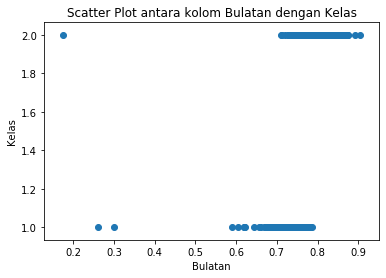

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Bulatan dan Kelas berkorelasi **positif** dan termasuk **Korelasi kuat**.

In [44]:
printMd("#### Bulatan")
printMd("Hasil korelasi kolom Bulatan(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{Bulatan,Kelas} = $"+str(gandum['Bulatan'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom Bulatan dengan Kelas")
plt.scatter(x=gandum['Bulatan'],y=gandum['Kelas'])
plt.xlabel("Bulatan")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Bulatan dan Kelas berkorelasi **positif** dan termasuk **Korelasi kuat**.")

#### Ransum

Hasil korelasi kolom Ransum(non-target) dengan kolom Kelas(target

$\rho_{Ransum,Kelas} = $-0.8399038681287546

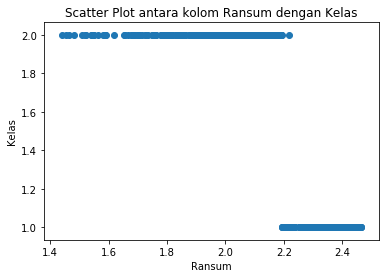

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Ransum dan Kelas berkorelasi **negatif** dan termasuk **Korelasi  sangat kuat**.

In [45]:
printMd("#### Ransum")
printMd("Hasil korelasi kolom Ransum(non-target) dengan kolom Kelas(target")
printMd("$\\rho_{Ransum,Kelas} = $"+str(gandum['Ransum'].corr(gandum['Kelas'])))
plt.title("Scatter Plot antara kolom Ransum dengan Kelas")
plt.scatter(x=gandum['Ransum'],y=gandum['Kelas'])
plt.xlabel("Ransum")
plt.ylabel("Kelas")
plt.show()
printMd("Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Ransum dan Kelas berkorelasi **negatif** dan termasuk **Korelasi  sangat kuat**.")

## Referensi
.<br>
.<br>
<b>Kalkulator titik kritis</b><br>
https://www.omnicalculator.com/statistics/critical-value<br>
<b>Uji Z</b><br>
https://www.rumusstatistik.com/2016/11/uji-z-hipotesis-proporsi-dua-populasi.html<br>
<b>Test Korelasi</b><br>
https://ujistatistikhalal.com/blog/uji-korelasi-r-dan-spss/#Definisi_Pearsons_Correlation_Test